#Data Visualization Project

---



#Importing Required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

#Datasets

In [ ]:
swise = pd.read_excel("statewise.xlsx")
swise.set_index('S. No.', inplace=True)
swise.head()

,Place,Males,Females,Total Confirmed cases,Cured/Discharged/,Death,Health workers,Average temerature
S. No.,,,,,,,,
1,Andaman and Nicobar Islands,1,11,12,11,0,255,26.5
2,Andhra Pradesh,245,358,603,42,15,362,30.0
3,Arunachal Pradesh,0,1,1,0,0,62,26.0
4,Assam,22,13,35,9,1,36,30.0
5,Bihar,15,70,85,37,2,373,26.0


In [ ]:
patients = pd.read_excel("patients_tested.xlsx")
patients.head()

,Name,Age,Gender,Vaccinated,Asthama,Diabetic,Lung cancer,Loss of taste-smell,Average Body Temperature,SPo2 Level,Location-Temperature Range,BP
0,hina singh,24,f,yes,no,yes,iniitial,little,98.8,87.0,26.5,high
1,rakesh singhania,25,m,yes,moderate,yes,no,no,97.0,89.0,30.0,normal
2,priya sinha,35,f,yes,moderate,yes,no,lot,100.0,88.0,26.0,high
3,shreya ghoshal,64,f,yes,moderate,yes,no,lot,102.0,88.0,30.0,high
4,sonu nigam,23,m,yes,moderate,yes,no,lot,101.3,90.0,26.0,normal


In [ ]:
kstates = pd.read_csv("states_kaggle.csv")
kstates.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,06:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,06:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,06:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,06:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,06:00 PM,Kerala,3,0,0,0,3


In [ ]:
swise.shape

(33, 8)

In [ ]:
patients.shape

(400, 12)

In [ ]:
kstates.shape

(9291, 9)

#Visualization Idioms on given Datasets

---



#Age distribution of Covid Patients

In [ ]:
age_df = patients.copy()
age_categ = []
for i,row in age_df.iterrows():
  if(row['Age'] < 18):
    age_categ.append('Minor')
  elif(row['Age'] >=18 and row['Age']<45):
    age_categ.append('Adults')
  elif(row['Age'] >=45 and row['Age']<60):
    age_categ.append('Senior Adults')
  else:
    age_categ.append('Senior Citizens')
age_df['Age_Category'] = age_categ
age_df

,Name,Age,Gender,Vaccinated,Asthama,Diabetic,Lung cancer,Loss of taste-smell,Average Body Temperature,SPo2 Level,Location-Temperature Range,BP,Age_Category
0,hina singh,24,f,yes,no,yes,iniitial,little,98.8,87.0,26.5,high,Adults
1,rakesh singhania,25,m,yes,moderate,yes,no,no,97.0,89.0,30.0,normal,Adults
2,priya sinha,35,f,yes,moderate,yes,no,lot,100.0,88.0,26.0,high,Adults
3,shreya ghoshal,64,f,yes,moderate,yes,no,lot,102.0,88.0,30.0,high,Senior Citizens
4,sonu nigam,23,m,yes,moderate,yes,no,lot,101.3,90.0,26.0,normal,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,amitabh raj,16,m,yes,no,no,iniitial,no,98.8,91.5,32.0,low,Minor
396,anuraj singh,33,m,no,no,yes,no,no,97.0,90.5,21.0,low,Adults
397,pia kumar,23,f,no,no,yes,no,little,100.0,87.0,33.0,low,Adults
398,yash anand,35,m,no,intense,no,iniitial,little,102.0,89.0,27.2,high,Adults


In [ ]:
cnt = age_df.groupby(['Age_Category']).count()
cnt

,Name,Age,Gender,Vaccinated,Asthama,Diabetic,Lung cancer,Loss of taste-smell,Average Body Temperature,SPo2 Level,Location-Temperature Range,BP
Age_Category,,,,,,,,,,,,
Adults,272,272,272,272,272,272,272,272,272,272,272,272
Minor,38,38,38,38,38,38,38,38,38,38,38,38
Senior Adults,47,47,47,47,47,47,47,47,47,47,47,47
Senior Citizens,43,43,43,43,43,43,43,43,43,43,43,43


Text(0.5, 1.0, 'Distribution of covid patients on basis of Age')

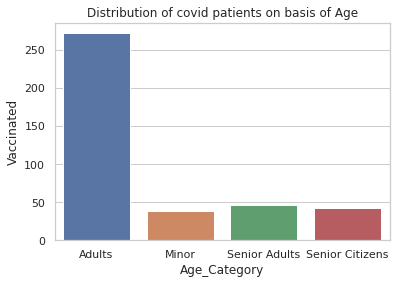

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=cnt.index ,y="Vaccinated", data=cnt)
plt.title('Distribution of covid patients on basis of Age')

#Distribution of Covid cases over Different States

In [ ]:
#Unique states
print(kstates["State"].unique())

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu'
 'Dadra and Nagar Haveli and Daman and Diu' 'Telangana' 'Telangana***'
 'Telengana***' 'Maharashtra***' 'Chandigarh***' 'Punjab***']


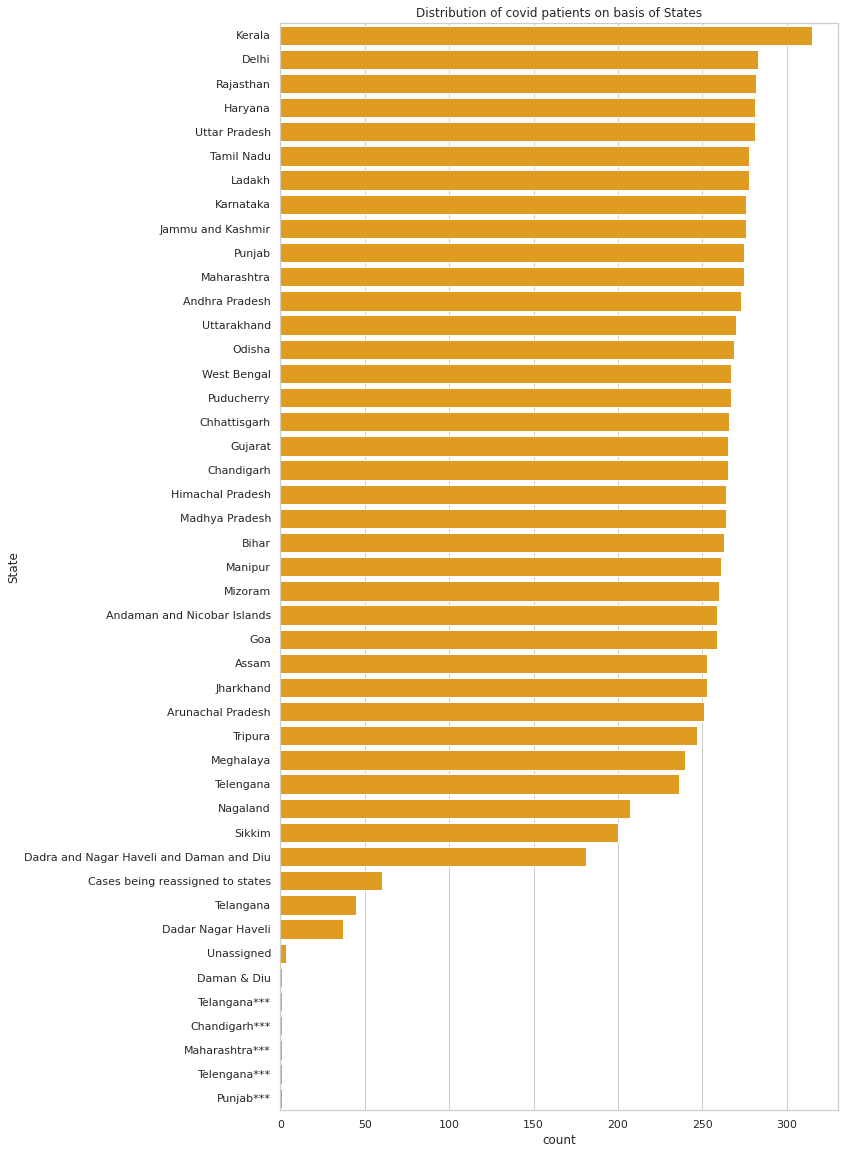

In [ ]:
plt.figure(figsize=(10, 20))

#adding order to order the plot
sns.countplot(y="State", data=kstates, color="orange", order = kstates['State'].value_counts().index)
plt.title('Distribution of covid patients on basis of States')
plt.show()

#Sex-based distribution of cases

In [ ]:
data = [['Confirmed cases', 64.56, 35.44, 2877791],
        ['Deaths', 64, 36, 3711],
        ['Vaccinations', 54.55, 45.45, 24525064]
        ]
gbased_df = pd.DataFrame(data=data, columns=['Type','Male','Female','Total'])
gbased_df.set_index('Type', inplace=True)
gbased_df

,Male,Female,Total
Type,,,
Confirmed cases,64.56,35.44,2877791
Deaths,64.00,36.00,3711
Vaccinations,54.55,45.45,24525064


<function matplotlib.pyplot.show>

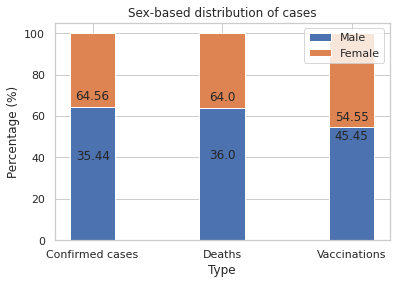

In [ ]:
N = 3
x = np.arange(N)    # the x locations for the groups = ind
width = 0.35       # the width of the bars
labels = gbased_df.index.tolist()
male = gbased_df['Male'].tolist()
female = gbased_df['Female'].tolist()

p1 = plt.bar(x, male, width)
p2 = plt.bar(x, female, width, bottom=male) 
plt.xlabel('Type')
plt.ylabel('Percentage (%)')
plt.title('Sex-based distribution of cases')
plt.xticks(x, tuple(labels))
plt.yticks(np.arange(0, 120, 20))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
#Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
  for rect in rects:
    x= rect.get_x()
    height = rect.get_height()
    width = rect.get_width()
    plt.annotate('{}'.format(height), textcoords="offset points", 
                xy=(x+width/2, height), xytext=(0,4),  #vertical offset
                ha='center', va='bottom')
autolabel(p1) 
autolabel(p2) 
plt.show
#autolabel is labelling vive versa 

#Affect of physical conditions on covid patients

---



Temperature

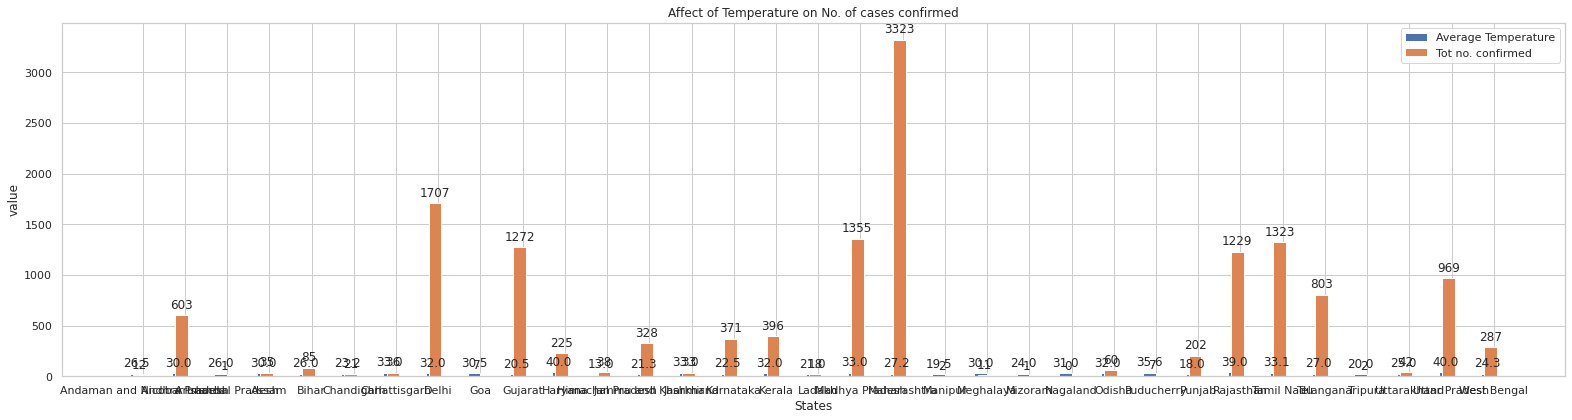

In [ ]:
labels = swise['Place'].unique()
temp = swise['Average temerature'].tolist() 
cases = swise['Total Confirmed cases'].tolist()
cure = swise['Cured/Discharged/'].tolist()
death = swise['Death'].tolist()
x = np.arange(0,len(labels))  #label locations
width = 0.3  #width of the bars
fig, ax = plt.subplots(figsize=(22,6))
rects1 = ax.bar(x - width/2, temp, width, label='Average Temperature')
rects2 = ax.bar(x - width/4, cases, width, label='Tot no. confirmed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_ylabel('value')
ax.set_title('Affect of Temperature on No. of cases confirmed')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,4),  #vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1) #attach labels to disp height of bar
autolabel(rects2)
fig.tight_layout()
plt.show()

Location- on Total cases

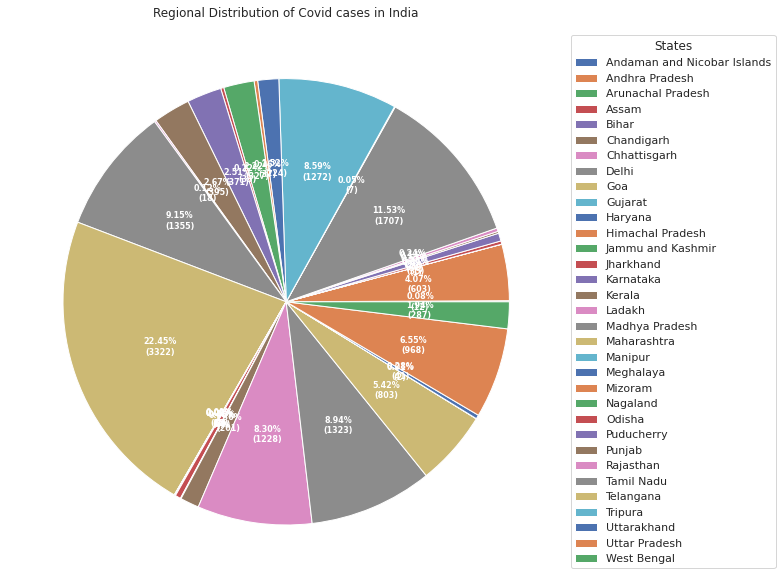

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), subplot_kw=dict(aspect="equal"))
cases = swise['Total Confirmed cases'].tolist()
states = swise['Place'].tolist()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(cases, autopct=lambda pct: func(pct, cases), textprops=dict(color="w"))
ax.legend(wedges, states, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Regional Distribution of Covid cases in India")
plt.show()

Location- on Recoveries

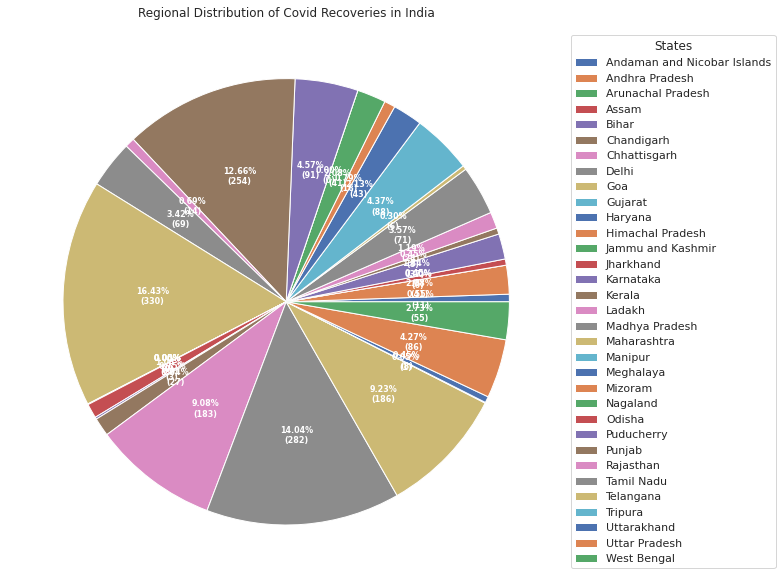

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), subplot_kw=dict(aspect="equal"))
cure = swise['Cured/Discharged/'].tolist()
states = swise['Place'].tolist()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(cure, autopct=lambda pct: func(pct, cure), textprops=dict(color="w"))
ax.legend(wedges, states, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Regional Distribution of Covid Recoveries in India")
plt.show()

Location- on Deaths

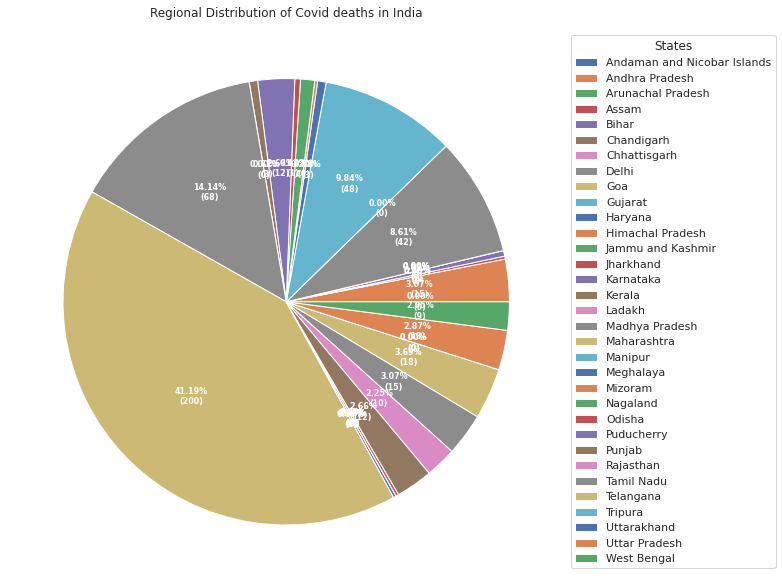

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), subplot_kw=dict(aspect="equal"))
deaths = swise['Death'].tolist()
states = swise['Place'].tolist()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(deaths, autopct=lambda pct: func(pct, deaths), textprops=dict(color="w"))
ax.legend(wedges, states, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Regional Distribution of Covid deaths in India")
plt.show()

#Affect of medical conditions on covid patients

---



Asthama

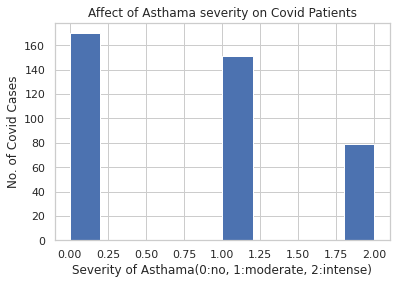

In [ ]:
#Quantify/ Encode severity
severity_mapping = {'no':0, 'moderate':1, 'intense':2}
patients['Asthama'] = patients['Asthama'].map(severity_mapping)
patients.hist(column='Asthama')
plt.xlabel('Severity of Asthama(0:no, 1:moderate, 2:intense)') 
plt.ylabel('No. of Covid Cases') 
plt.title('Affect of Asthama severity on Covid Patients')
plt.show()

Diabetes

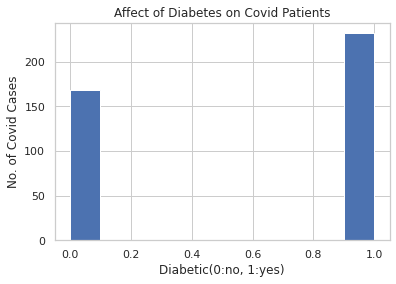

In [ ]:
#Quantify/ Encode severity
severity_mapping = {'no':0, 'yes':1}
patients['Diabetic'] = patients['Diabetic'].map(severity_mapping)
patients.hist(column='Diabetic')
plt.xlabel('Diabetic(0:no, 1:yes)') 
plt.ylabel('No. of Covid Cases') 
plt.title('Affect of Diabetes on Covid Patients')
plt.show()

Lung Cancer

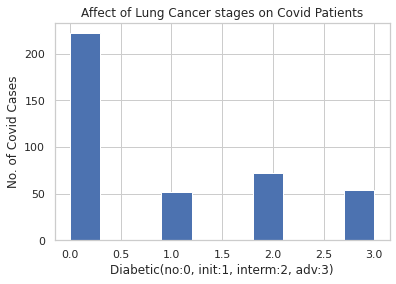

In [ ]:
#Quantify/ Encode severity
severity_mapping = {'no':0, 'iniitial':1, 'intermediate':2, 'advanced':3}
patients['Lung cancer'] = patients['Lung cancer'].map(severity_mapping)

patients.hist(column='Lung cancer')
plt.xlabel('Diabetic(no:0, init:1, interm:2, adv:3)') 
plt.ylabel('No. of Covid Cases') 
plt.title('Affect of Lung Cancer stages on Covid Patients')
plt.show()

Correlation between different pairs of medical factors 

In [ ]:
medical_attri = patients.copy()
medical_attri = medical_attri.sort_values(['Gender'], ascending = True)
print(medical_attri.shape)
medical_attri

(400, 12)


,Name,Age,Gender,Vaccinated,Asthama,Diabetic,Lung cancer,Loss of taste-smell,Average Body Temperature,SPo2 Level,Location-Temperature Range,BP
0,hina singh,24,f,yes,0,1,1,little,98.8,87.0,26.5,high
134,Kriti,52,f,yes,2,1,0,lot,98.5,88.0,27.2,normal
297,pia kumar,21,f,no,0,1,0,little,97.4,90.0,22.5,low
300,hina singh,25,f,no,1,1,3,no,100.0,92.0,33.0,high
302,priya sinha,32,f,yes,1,1,2,no,101.3,92.5,33.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Pradeep Agrawal,32,m,yes,0,0,0,lot,98.0,89.5,33.0,normal
144,Bharat Kumar,75,m,yes,0,0,1,lot,99.7,89.0,21.0,high
143,Mukesh,56,m,no,0,1,2,no,101.1,91.5,32.0,high
153,Rajesh Sharma,64,m,no,1,1,2,little,99.6,91.0,30.0,normal


Text(0.5, 1.0, 'Correlation between different pairs of medical factors ')

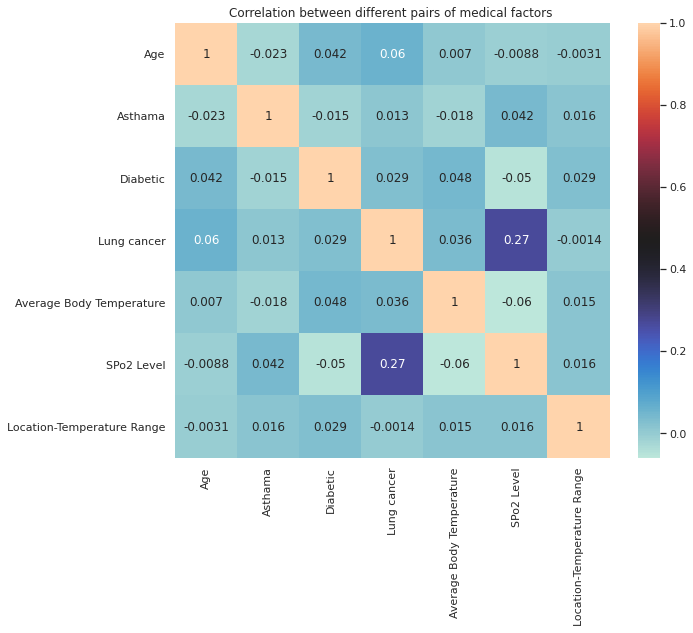

In [ ]:
# correlation plot
fig, ax = plt.subplots(figsize = (10,8))
corr = medical_attri.corr()
sns.set_theme(style="dark")
cmap = sns.color_palette("icefire", as_cmap=True)
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),
            cmap = cmap, square = True, ax = ax, annot=True)
plt.title("Correlation between different pairs of medical factors ")

Relationship between Age, Gender, Avg_Body_Temperature, Vaccinated and SpO2 level

In [ ]:
med_df = age_df.copy()
mean_val = age_df.groupby(['Age_Category']).mean()
mean_T = mean_val['Average Body Temperature']
mean_bt = []
print(mean_T)

Age_Category
Adults             98.881618
Minor              98.857895
Senior Adults      99.272340
Senior Citizens    98.762791
Name: Average Body Temperature, dtype: float64


In [ ]:
for i,row in med_df.iterrows():
  if(row['Age_Category'] == 'Adults'):
    mean_bt.append(mean_T[0])
  elif(row['Age_Category'] == 'Minor'):
    mean_bt.append(mean_T[1])
  elif(row['Age_Category'] == 'Senior Adults'):
    mean_bt.append(mean_T[2])
  else:
    mean_bt.append(mean_T[3])
med_df['Avg_body_temp'] = mean_bt
med_df['Average Body Temperature-stdDeviation'] = med_df['Average Body Temperature'] - med_df['Avg_body_temp']
med_df

,Name,Age,Gender,Vaccinated,Asthama,Diabetic,Lung cancer,Loss of taste-smell,Average Body Temperature,SPo2 Level,Location-Temperature Range,BP,Age_Category,Avg_body_temp,Average Body Temperature-stdDeviation
0,hina singh,24,f,yes,no,yes,iniitial,little,98.8,87.0,26.5,high,Adults,98.881618,-0.081618
1,rakesh singhania,25,m,yes,moderate,yes,no,no,97.0,89.0,30.0,normal,Adults,98.881618,-1.881618
2,priya sinha,35,f,yes,moderate,yes,no,lot,100.0,88.0,26.0,high,Adults,98.881618,1.118382
3,shreya ghoshal,64,f,yes,moderate,yes,no,lot,102.0,88.0,30.0,high,Senior Citizens,98.762791,3.237209
4,sonu nigam,23,m,yes,moderate,yes,no,lot,101.3,90.0,26.0,normal,Adults,98.881618,2.418382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,amitabh raj,16,m,yes,no,no,iniitial,no,98.8,91.5,32.0,low,Minor,98.857895,-0.057895
396,anuraj singh,33,m,no,no,yes,no,no,97.0,90.5,21.0,low,Adults,98.881618,-1.881618
397,pia kumar,23,f,no,no,yes,no,little,100.0,87.0,33.0,low,Adults,98.881618,1.118382
398,yash anand,35,m,no,intense,no,iniitial,little,102.0,89.0,27.2,high,Adults,98.881618,3.118382


In [ ]:
#plotting using diff channels
alt.Chart(med_df).mark_point(filled=False, size=120).encode(
    alt.X('Age:Q'),
    alt.Y('SPo2 Level:Q'),
    alt.Color('Gender:N'),
    alt.OpacityValue(0.9),
    alt.Size('Average Body Temperature-stdDeviation:Q'),
    alt.Shape('Vaccinated:N')
)

alt.Chart(...)